In [1]:
# Necessary Imports 

import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

data = pd.read_csv(r'C:\Assignements & HW\SQL Assignment\python\titanic_train.csv')

In [2]:
# Import necessory libraries 

import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt 
# import plotly

import warnings 
warnings.filterwarnings('ignore')

In [3]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [22]:
data["Survived"].unique()

array([0, 1], dtype=int64)

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data['Sex'] = data['Sex'].replace({'male':1,'female':0})

In [10]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Finding the count of missing value from different columns 
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Fill the Null Values 

data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Age'] = data['Age'].fillna(data['Age'].mean())



In [13]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

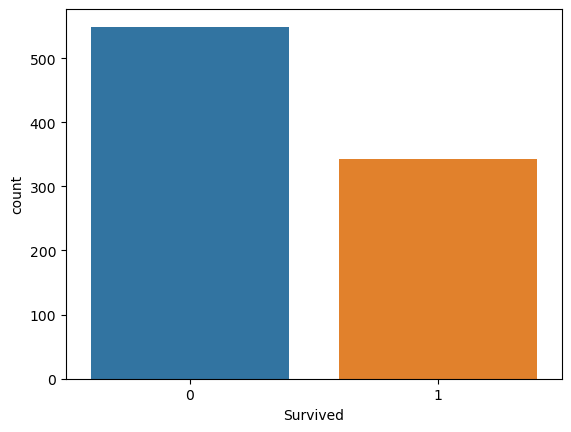

In [15]:
# Plot 

sns.countplot(x = 'Survived', data = data)
plt.show()

In [16]:
# Divide the data set into features and label 

y = data['Survived']
x = data.drop(columns = ['Survived'])

In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,0,35.000000,1,0,113803,53.1000,C123,S
4,5,3,1,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,0,19.000000,0,0,112053,30.0000,B42,S
888,889,3,0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,26.000000,0,0,111369,30.0000,C148,C


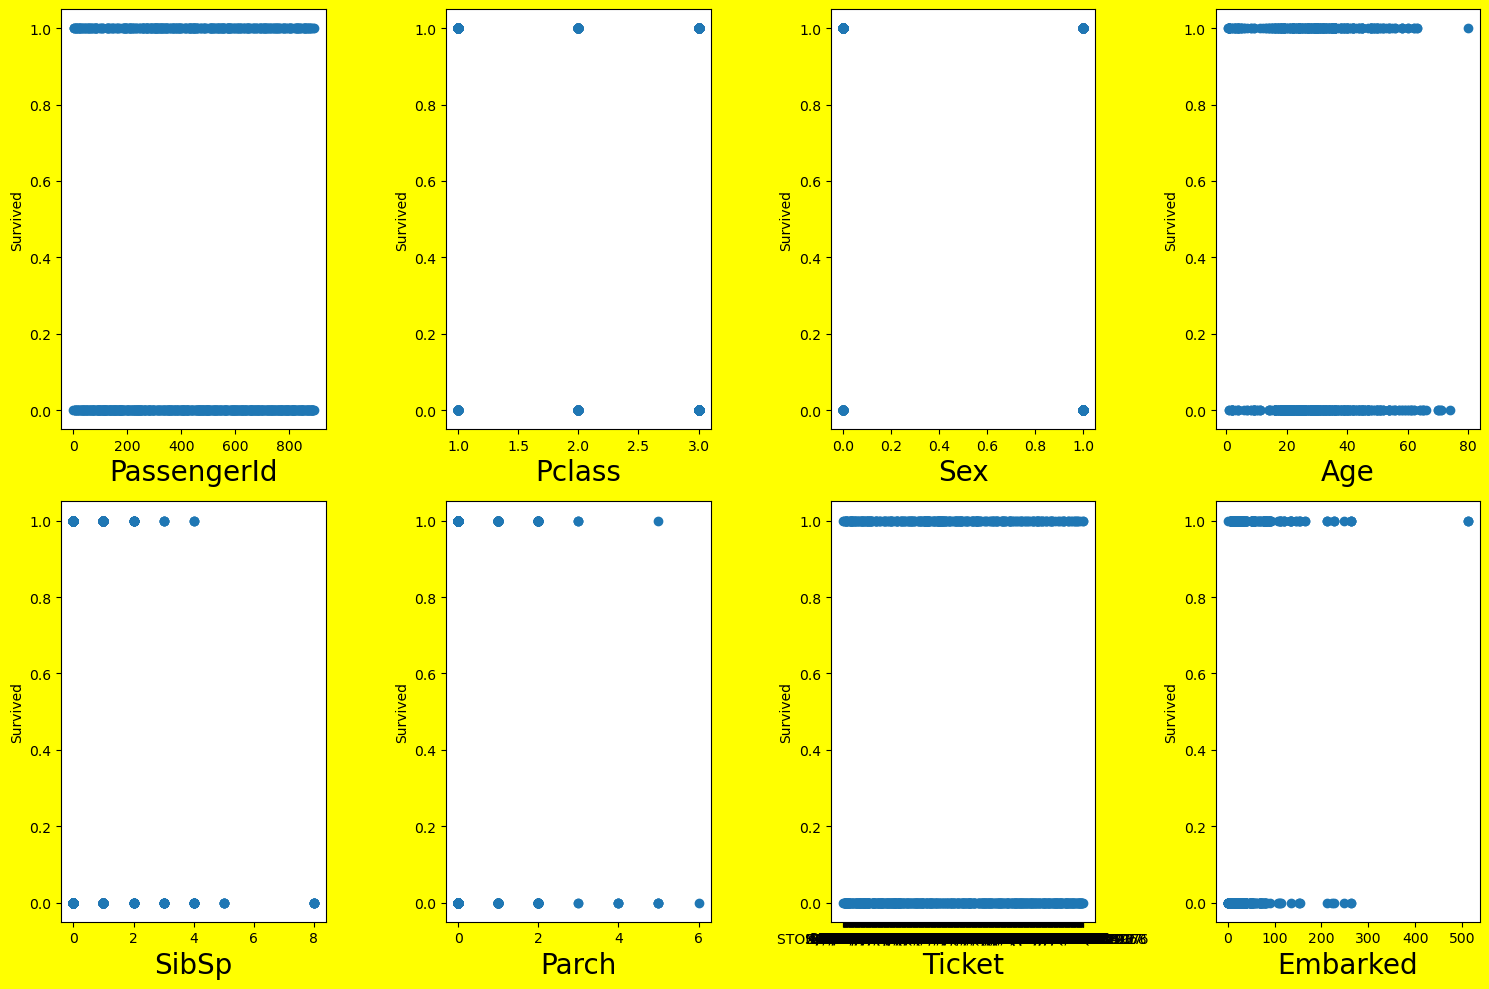

In [19]:
# Visualizing relationship

plt.figure(figsize=(15,10), facecolor ='yellow')
plotnumber = 1 

for column in x:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Survived', fontsize = 10)
    plotnumber +=1
plt.tight_layout()


<Axes: xlabel='Parch', ylabel='Survived'>

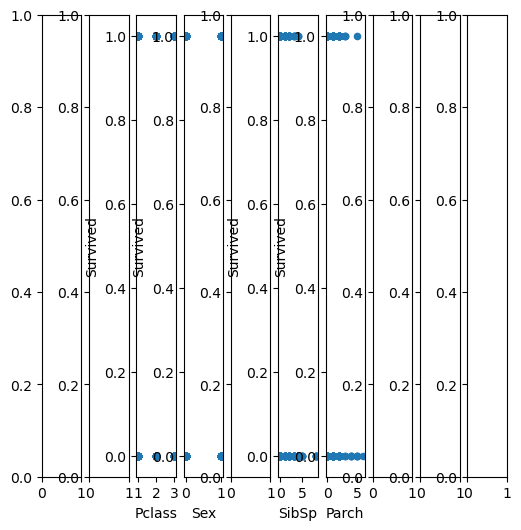

In [40]:
# Visualize the relationship between the features and the response using scatter plots

fig, axs=plt.subplots(1,10)

data.plot(kind='scatter', x ='Pclass', y = 'Survived', ax=axs[2],figsize=(6,6))
data.plot(kind='scatter', x ='Sex', y = 'Survived', ax=axs[3])
data.plot(kind='scatter', x ='SibSp', y = 'Survived', ax=axs[5])
data.plot(kind='scatter', x ='Parch', y = 'Survived', ax=axs[6])


In [ ]:
# Gradient Descent 

# Create x = feature and y = label 

In [70]:
x = data[['SibSp']]
y = data.Survived

# Follow the usual sklearn pattern: import , instantiate, fit 

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [71]:
# Print intercept and coefficient

print(lm.intercept_)
print(lm.coef_)

0.3919901276560442
[-0.01558627]


In [95]:
# Use the model to make prediction on a new value

lm.predict([[100,100,100,100]])

array([-70.91620845])

In [96]:
from sklearn.metrics import r2_score

In [97]:
# Pass all Pclass records and predict Survived 
predicted_Survived = lm.predict(x)

In [98]:
x.head()

,Pclass,Sex,SibSp,Parch
0,3,1,1,0
1,1,0,1,0
2,3,0,0,0
3,1,0,1,0
4,3,1,0,0


In [99]:
predicted_Survived

array([ 0.07999409,  0.91622007,  0.63858822,  0.91622007,  0.10979185,
        0.10979185,  0.41722146,  0.01254809,  0.62288726,  0.76250526,
        0.60093998,  0.94601783,  0.10979185,  0.0407417 ,  0.63858822,
        0.79230302, -0.01724967,  0.26350666,  0.60879046,  0.63858822,
        0.26350666,  0.26350666,  0.63858822,  0.41722146,  0.54134446,
        0.56953807,  0.10979185,  0.31212723,  0.63858822,  0.10979185,
        0.41722146,  0.91622007,  0.63858822,  0.26350666,  0.3874237 ,
        0.3874237 ,  0.10979185,  0.10979185,  0.5789927 ,  0.60879046,
        0.60879046,  0.76250526,  0.10979185,  0.74680431,  0.63858822,
        0.10979185,  0.07999409,  0.63858822,  0.05019633,  0.60879046,
       -0.01724967,  0.10979185,  0.91622007,  0.76250526,  0.40937099,
        0.41722146,  0.79230302,  0.10979185,  0.74680431, -0.0548979 ,
        0.10979185,  0.94601783,  0.3874237 ,  0.00469762,  0.41722146,
        0.07214361,  0.79230302,  0.10979185,  0.50369622,  0.05

In [100]:
# Let's compare original Survived number with our model predicted Survived 

r2_score(y_true=y, y_pred=predicted_Survived)

0.3729644980306335

In [101]:
# Create X and Y 

x= data[['Pclass', 'Sex', 'SibSp','Parch']]
y = data.Survived

lm = LinearRegression()
lm.fit(x,y)

# print intercept and coefficients

print('Intercept:-> ', lm.intercept_)
print('Pclass :- >', lm.coef_[0])
print('Sex :- >', lm.coef_[1])
print('SibSp :- >', lm.coef_[2])
print('Parch :- >', lm.coef_[3])


Intercept:->  1.0997326372746268
Pclass :- > -0.1537148069066484
Sex :- > -0.5287963668088645
SibSp :- > -0.029797759611621344
Parch :- > -0.007850477579371556


In [102]:
# Preparing data for R2_score on SibSp and Parch as we can see they are positively related (co-efficient)

x = data[['SibSp','Parch']]
y = data.Survived

In [103]:
# Let's feed features and label and train the model 
lm.fit(x,y)

LinearRegression()

In [104]:
# Check the r2

predicted_Survived = lm.predict(x)
r2_score(y, predicted_Survived)

0.012444941322521719

In [105]:
# Let's do the same for all the features 

x = data[['Pclass','Sex','SibSp','Parch']]
y = data.Survived

# Training 
lm.fit(x,y)

# r2

predicted_Survived = lm.predict(x)
r2_score(y, predicted_Survived)

0.3729644980306335